<a href="https://colab.research.google.com/github/vapaul10/BusinessProgramming/blob/master/ISTM_631_6th_session_10_5_2020.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

web scraping using different libraries and modules 

making a data pipeline

making a predictive model

In [ ]:
import pandas as pd
import time

article = pd.read_html('https://en.wikipedia.org/wiki/2018_FIFA_World_Cup',header=0)
df = article[5]
count = 0
for i in range(0,len(article)):
  df = article[i]
  #print(df.head())
  count += 1
count

96

In [ ]:
article[12]

,Saudi Arabia,2–1,Egypt
0,Al-Faraj 45+6' (pen.) Al-Dawsari 90+5',Report,Salah 22'


we have different approaches to get data from web:

1- to use request and urls

In [ ]:
import bs4
import pandas as pd
import requests

In [1]:
def numeric_value(movie, tag, class_=None, order=None):
    if order:
        if len(movie.findAll(tag, class_)) > 1:
            to_extract = movie.findAll(tag, class_)[order]['data-value']
        else:
            to_extract = None
    else:
        to_extract = movie.find(tag, class_)['data-value']

    return to_extract


def text_value(movie, tag, class_=None):
    if movie.find(tag, class_):
        return movie.find(tag, class_).text
    else:
        return


def nested_text_value(movie, tag_1, class_1, tag_2, class_2, order=None):
    if not order:
        return movie.find(tag_1, class_1).find(tag_2, class_2).text
    else:
        return [val.text for val in movie.find(tag_1, class_1).findAll(tag_2, class_2)[order]]


def extract_attribute(soup, tag_1, class_1='', tag_2='', class_2='',
                      text_attribute=True, order=None, nested=False):
    movies = soup.findAll('div', class_='lister-item-content')
    data_list = []
    for movie in movies:
        if text_attribute:
            if nested:
                data_list.append(nested_text_value(movie, tag_1, class_1, tag_2, class_2, order))
            else:
                data_list.append(text_value(movie, tag_1, class_1))
        else:
            data_list.append(numeric_value(movie, tag_1, class_1, order))

    return data_list


In [4]:
url = 'https://www.imdb.com/search/title/?count=100&groups=top_1000&sort=user_rating'
def get_page_contents(url):
  page = requests.get(url, headers={"Accept-Language": "en-US"})
  return bs4.BeautifulSoup(page.text, "html.parser")

soup = get_page_contents(url)

NameError: ignored

In [ ]:
titles = extract_attribute(soup, 'a')
release = extract_attribute(soup, 'span', 'lister-item-year text-muted unbold')
audience_rating = extract_attribute(soup, 'span', 'certificate')
runtime = extract_attribute(soup, 'span', 'runtime')
genre = extract_attribute(soup, 'span', 'genre')
imdb_rating = extract_attribute(soup, 'div', 'inline-block ratings-imdb-rating', False)
votes = extract_attribute(soup, 'span' , {'name' : 'nv'}, False, 0)
earnings = extract_attribute(soup, 'span' , {'name' : 'nv'}, False, 1)
#directors = extract_attribute(soup, 'p', '', 'a', '', True, 0, True)
actors = extract_attribute(soup, 'p', '', 'a', '', True, slice(1, 5, None), True)


df_dict = {'Title': titles, 'Relase': release, 'Audience Rating': audience_rating,
           'Runtime': runtime, 'Genre': genre, 'IMDB Rating': imdb_rating,
           'Votes': votes, 'Box Office Earnings': earnings, 
           'Actors': actors} #'Director': directors,
df = pd.DataFrame(df_dict)
df

,Title,Relase,Audience Rating,Runtime,Genre,IMDB Rating,Votes,Box Office Earnings,Actors
0,The Shawshank Redemption,(1994),R,142 min,\nDrama,\n\n9.3\n,"2,290,453","2,290,453",[]
1,The Godfather,(1972),R,175 min,"\nCrime, Drama",\n\n9.2\n,"1,580,220","1,580,220",[]
2,The Dark Knight,(2008),PG-13,152 min,"\nAction, Crime, Drama",\n\n9.0\n,"2,255,578","2,255,578",[]
3,The Godfather: Part II,(1974),R,202 min,"\nCrime, Drama",\n\n9.0\n,"1,104,034","1,104,034",[]
4,The Lord of the Rings: The Return of the King,(2003),PG-13,201 min,"\nAction, Adventure, Drama",\n\n8.9\n,"1,610,555","1,610,555",[]
...,...,...,...,...,...,...,...,...,...
95,Snatch,(2000),R,102 min,"\nComedy, Crime",\n\n8.3\n,"769,296","769,296",[]
96,Requiem for a Dream,(2000),R,102 min,\nDrama,\n\n8.3\n,"751,729","751,729",[]
97,American Beauty,(1999),R,122 min,\nDrama,\n\n8.3\n,"1,052,671","1,052,671",[]
98,Good Will Hunting,(1997),R,126 min,"\nDrama, Romance",\n\n8.3\n,"842,006","842,006",[]


In [ ]:
imdb_rating[0].split()

['9.3']

In [ ]:
df.to_csv('table')

In [ ]:
base_url = requests.get('https://www.indeed.com/cmp/Google/reviews?fcountry=ALL&start=', timeout=5)
print(base_url.text)

In [ ]:
def parse(full_url):
    page_content = BeautifulSoup(full_url.content, 'lxml')
    containers = page_content.findAll('div', 
                 {'class':'cmp-Review-container'})
    df = pd.DataFrame(columns = 
         ['rating', 'rating_title',  'rating_description',
                         'rating_pros', 'rating_cons'])
    
    for item in containers:
        try:
            rating = item.find('div', 
                     {'class': 'cmp-ReviewRating-text'}).text.replace('\n', '')
        except:
            rating = None
        try:
            rating_title = item.find('div', 
                           {'class': 'cmp-Review-title'}).text.replace('\n', '')
        except:
            rating_title = None
        try:
            rating_description = item.find('span', 
                                 {'itemprop': 'reviewBody'}).text.replace('\r', '. ')
        except:
            rating_description = None
        try:
            rating_pros = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-prosText'}).text.replace('\n', '')
        except:
            rating_pros = None
        try:
            rating_cons = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-consText'}).text.replace('\n', '')
        except:
            rating_cons = None
        df = df.append({'rating': rating, 
             'rating_title': rating_title, 
             'rating_description': rating_description,
             'rating_pros': rating_pros, 
             'rating_cons': rating_cons}, ignore_index=True)
    return df

In [ ]:
def parse(full_url):
    page_content = BeautifulSoup(full_url.content, 'lxml')
    containers = page_content.findAll('div', 
                 {'class':'cmp-Review-container'})
    df = pd.DataFrame(columns = 
         ['rating', 'rating_title',  'rating_description',
                         'rating_pros', 'rating_cons'])
    
    for item in containers:        
        try:
            rating = item.find('div', 
                     {'class': 'cmp-ReviewRating-text'}).text.replace('\n', '')
        except:
            rating = None
        try:
            rating_title = item.find('div', 
                           {'class': 'cmp-Review-title'}).text.replace('\n', '')
        except:
            rating_title = None
        try:
            rating_description = item.find('span', 
                                 {'itemprop': 'reviewBody'}).text.replace('\r', '. ')
        except:
            rating_description = None
        try:
            rating_pros = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-prosText'}).text.replace('\n', '')
        except:
            rating_pros = None
        try:
            rating_cons = item.find('div', 
                          {'class': 'cmp-ReviewProsCons-consText'}).text.replace('\n', '')
        except:
            rating_cons = None
        df = df.append({'rating': rating, 
             'rating_title': rating_title, 
             'rating_description': rating_description,
             'rating_pros': rating_pros, 
             'rating_cons': rating_cons}, ignore_index=True)
    return df

In [ ]:
from urllib.request import urlopen
from bs4 import BeautifulSoup

In [ ]:
base_url = 'https://www.indeed.com/cmp/Google/reviews?fcountry=ALL&start='
all_reviews_df = pd.DataFrame(columns = ['rating', 'rating_title', 
'rating_description','rating_pros', 'rating_cons'])
num_reviews = 20
# you can adjust this number on how many reviews you which to scrape
while num_reviews < 3000:  
    
    full_url = base_url + str(num_reviews)
    
    get_url = requests.get(full_url, timeout=5)  
        
    partial_reviews_df = parse(get_url)   
    all_reviews_df = all_reviews_df.append(
                     partial_reviews_df, ignore_index=True) 
    
    num_reviews += 20

In [ ]:
all_reviews_df.to_csv('indeed_scrape.csv')

In [ ]:
all_reviews_df

,rating,rating_title,rating_description,rating_pros,rating_cons
0,4.0,Great experience,-Worked as a contractor and was able to meet i...,None,None
1,5.0,typest,ndeed is a fantastic place to work and your co...,culture,None
2,5.0,Fun Place to work,"Google has their own culture, what you see in ...","Free lunches, Lear alot, gBus commute",No cons
3,4.0,Contracting at Google is what you make it,The potential upward mobility as a contractor ...,"Free lunch, Upward mobility","Work life balance, TVC inequality"
4,3.0,Google Cloud has a lot of challenges,"Working at Google cloud has many challenges, a...","Good benefits, the company is going after the ...","Unprepared management, to many escalation leve..."
...,...,...,...,...,...
2935,5.0,Fun workplace,My everyday routine at Google was to correct a...,Free Meals.,None
2936,4.0,Productive,The position was very productive. Help manage ...,"Free lunches, Great Pay",Short Brakes
2937,5.0,Freedom working from home!,I got to work at home on my computer everyday ...,Freedom working from home!,Benefits weren't great
2938,5.0,Freedom working from home!,I got to work at home on my computer everyday ...,Freedom working from home!,Benefits weren't great


In [ ]:
import numpy as np
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import random

In [ ]:
df = all_reviews_df

df.describe()

,rating,rating_title,rating_description,rating_pros,rating_cons
count,2940,2940,2940,1110,997
unique,5,2329,2794,938,883
top,5.0,Great experience,-Worked as a contractor and was able to meet i...,Free lunches,none
freq,1563,148,140,29,18


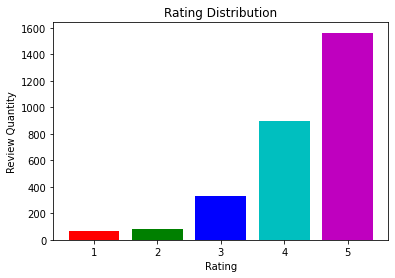

In [ ]:
groups = df.groupby('rating').count()
Values = groups.rating_title
colors = ['r', 'g', 'b', 'c', 'm']
#making bar plot
plt.bar(([1,2,3,4,5]), Values, color= colors)
plt.title('Rating Distribution')
plt.xlabel('Rating')
plt.ylabel('Review Quantity')
plt.show()

In [ ]:
df['rating'][0]

'4.0'